In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
data = pd.DataFrame(pd.read_csv('/kaggle/input/boston-housing-prices-dataset/BostonHousing.csv'))
print(data.head(5))

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
data['price']=data['medv']
boston_data = data.drop('medv', axis=1)
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston_data.shape

(506, 14)

In [5]:
boston_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [6]:
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
price      float64
dtype: object

In [7]:
boston_data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
price      229
dtype: int64

In [8]:
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [9]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
corr = boston_data.corr()
corr.shape

(14, 14)

<Axes: >

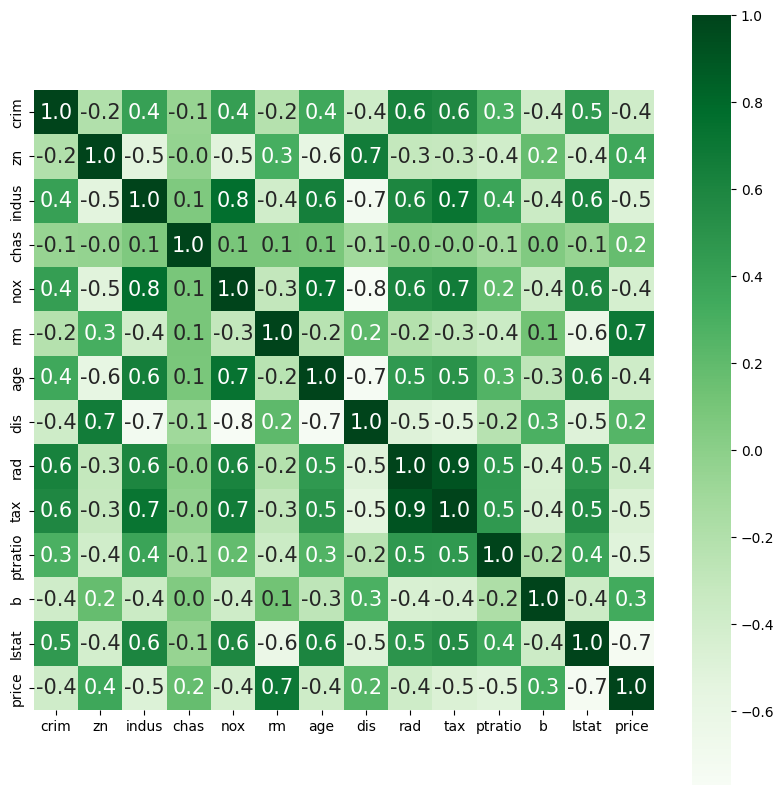

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15}, cmap='Greens')

# Simple Linear regression (SLR)

In [12]:
X= boston_data[['zn']]
y=boston_data['price']

In [13]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [14]:
slr=LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [15]:
slr.intercept_

20.788153309365864

In [16]:
slr.coef_

array([0.12268963])

In [17]:
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0:'Attribute',1:'Coefficients'})
coeffcients

,Attribute,Coefficients
0,zn,0.12269


In [18]:
y_pred=slr.predict(X_train)
y_pred

array([20.78815331, 30.60332366, 20.78815331, 20.78815331, 23.2419459 ,
       20.78815331, 23.2419459 , 20.78815331, 30.60332366, 20.78815331,
       26.30918663, 20.78815331, 20.78815331, 20.78815331, 20.78815331,
       20.78815331, 20.78815331, 20.78815331, 23.85539405, 20.78815331,
       20.78815331, 20.78815331, 23.48732516, 20.78815331, 20.78815331,
       20.78815331, 20.78815331, 23.2419459 , 23.48732516, 20.78815331,
       20.78815331, 20.78815331, 20.78815331, 20.78815331, 20.78815331,
       23.48732516, 20.78815331, 20.78815331, 20.78815331, 20.78815331,
       23.85539405, 22.32177368, 23.2419459 , 20.78815331, 20.78815331,
       20.78815331, 32.44366811, 20.78815331, 20.78815331, 20.78815331,
       20.78815331, 20.78815331, 20.78815331, 20.78815331, 29.37642737,
       20.78815331, 20.78815331, 31.21677181, 24.22346293, 20.78815331,
       20.78815331, 23.2419459 , 24.95960071, 20.78815331, 20.78815331,
       20.78815331, 20.78815331, 20.78815331, 25.08229034, 20.78

In [19]:
print('R^2: ',metrics.r2_score(Y_train,y_pred))
print('MAE: ', metrics.mean_absolute_error(Y_train,y_pred))
print('MSE: ',metrics.mean_squared_error(Y_train,y_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2:  0.10670329375268273
MAE:  5.819895970713946
MSE:  67.23918421411499
RMSE : 8.199950256807353


Text(0.5, 1.0, 'Price vs Predicted price')

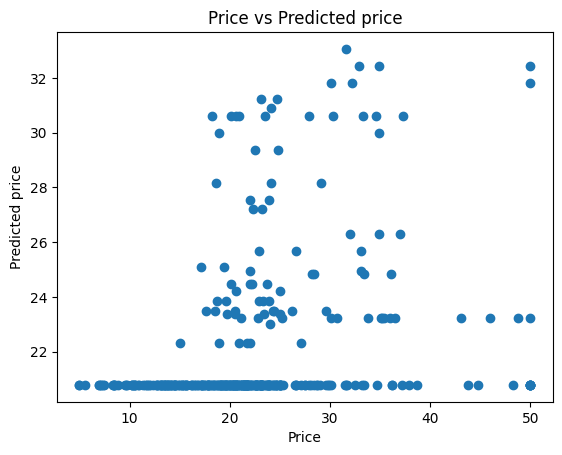

In [20]:
plt.scatter(Y_train,y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted price")
plt.title("Price vs Predicted price")